# 大課題　ボストン住宅価格予測

### データを取得する 

In [1]:
# 必要モジュールの用意
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
boston = load_boston()
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [3]:
# columnsにはload_boston().feature_namesを指定して、カラム名を指定します。
#もしくはインスタンス.feature_names
X = pd.DataFrame(boston.data, columns=boston.feature_names)
# columnsには、'MEDV'を指定します。
y = pd.DataFrame(boston.target, columns=['MEDV'])
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### データ探索　EDA

### 基本的なデータ探索

boston.DESCRと[ここ](https://www.sciencedirect.com/science/article/pii/0095069678900062)から調べた結果を述べる。

- このデータセットは何のデータセットであるか(何のために作成されたか、誰が作成したか、何年に作成されたか)
    - why : 大気質改善活動へお金を払う意志があるかを調べる
    - who : Harrison, D. and Rubinfeld, D.L.
    - when : July 7, 1993


- それぞれのカラムは何を表しているのか
    - CRIM     犯罪発生率（人口単位）
    - ZN       25,000平方フィート以上の住宅区画の割合
    - INDUS    非小売業の土地面積の割合（人口単位）
    - CHAS     チャールズ川沿いかどうか（1:Yes、0:No）
    - NOX      窒素酸化物の濃度（pphm単位）
    - RM       1戸あたりの平均部屋数
    - AGE      1940年よりも前に建てられた家屋の割合
    - DIS      ボストンの主な5つの雇用圏までの重み付きの距離
    - RAD     幹線道路へのアクセス指数
    - TAX     10,000ドルあたりの所得税率
    - PTRATIO  教師あたりの生徒の数（人口単位）
    - B        アフリカ系アメリカ人居住者の割合（人口単位）
    - LSTAT    低所得者の割合
    - MEDV     住宅価格の中央値（単位 1,000ドル）

In [4]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

### 基本的なデータ探索について記述せよ

### 一変数の可視化

In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [6]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


### describeメソッドを用いることで把握できたこと(考察)を記述せよ

- 前処理に関して気をつけるべき点
    - 特徴量のスケールをみて必要に応じて、フィーチャースケーリングを行う。
    - 最大最小を見て外れ値がある場合はそれをどうするか。（外れ値のまま処理するか、除外するか）
    - 0データは値が０なのか計測できなかったから０なのか

- 機械学習の手法選択に活かせること
- 機械学習の特徴選択について考えられること
    - データ量や特徴量の多さによって適切なモデルやハイパーパラメータを選択する。
    （データや特徴量の個数が増えると計算量が膨大になるモデルは避ける）
    - 外れ値や０の値が多い、スケールが異なる場合はそれに対応する前処理をしなくてはならないため前処理を検討するためにさらに分析に入るか、それともまずランダムフォレストなどで学習してみる

### 二変数の可視化

### 二変数の可視化　相関

In [7]:
X_y = pd.concat([X, y], axis=1)
corr_matrix = X_y.corr()
corr_matrix['MEDV']

CRIM      -0.385832
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

In [8]:
np.abs(corr_matrix['MEDV'])

CRIM       0.385832
ZN         0.360445
INDUS      0.483725
CHAS       0.175260
NOX        0.427321
RM         0.695360
AGE        0.376955
DIS        0.249929
RAD        0.381626
TAX        0.468536
PTRATIO    0.507787
B          0.333461
LSTAT      0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

### 二変数の可視化について記述せよ　相関

相関とは２つの変数間の関係性のこと。
一方の数値が大きくなったときに、それに合わせてもう片方が大きくなるときに正の相関が強く、
逆に小さくなるときは負の相関が強いと表現します。
相関が強いときは片方の値からもう片方の値を推測しやすい状態とも言えます。

上の出力結果から、MEDVと最も相関が強いのは上から

- LSTAT
- RM
- PTRATIO

となります。

今回の場合、
目的変数との相関が強い特徴量を見つけることで販売価格を上下しやすい特徴を見つけ出し、
不動産であれば、その特徴量にフォーカスして新しい家を立てることで漫然と家を建てるより販売価格を高く設定しても購入が見込める。

### 相関の注意点について記述せよ

相関は外れ値があるときに、その影響を受けやすいため数値上相関があるように見えることがある。
外れ値は**散布図を見る**ことで確認することができ、
外れ値がある場合は外れ値を除外して相関を取ってみることで正しい相関を見ることができる。

### 二変数の可視化　プロット

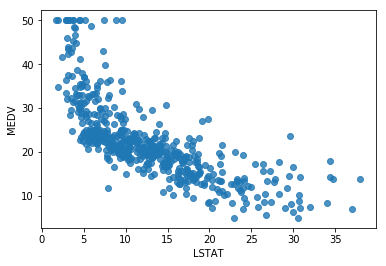

In [9]:
sns.regplot(x="LSTAT", y="MEDV", data=X_y, fit_reg=False);

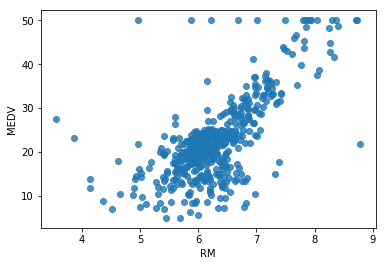

In [10]:
sns.regplot(x="RM", y="MEDV", data=X_y, fit_reg=False);

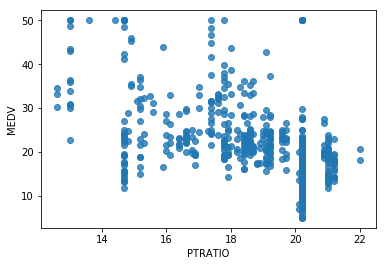

In [11]:
sns.regplot(x="PTRATIO", y="MEDV", data=X_y, fit_reg=False);

### 二変数の可視化について記述せよ　プロット

表示したどの特徴量も相関は見られるものの同じ値で幅があったり、外れ値が散見される。
感覚的だが、
LSTATは概ね相関があり、
RMは外れ値の対処をすれば相関があるといえ、
PTRATIOは相関があるとは言えない。

### データセット分割

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### 学習

深さ１，２，３の決定係数をそれぞれ出力する。

In [13]:
from sklearn.tree import DecisionTreeRegressor

for i in range(1,4):
    clf = DecisionTreeRegressor(max_depth=i, random_state=0)
    clf.fit(X_train, y_train)
    print('Depth {} : {}'.format(i, clf.score(X_test, y_test)))

Depth 1 : 0.4065506603539385
Depth 2 : 0.7436066708330533
Depth 3 : 0.740931277984053


### 決定係数

### 学習曲線

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")

Automatically created module for IPython interactive environment


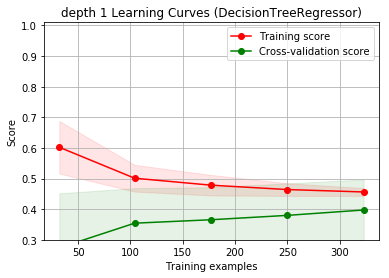

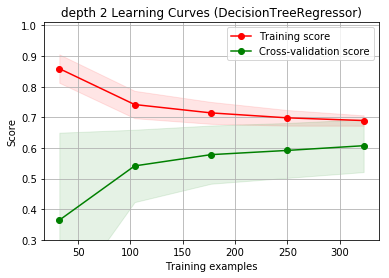

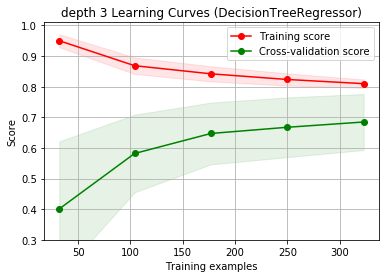

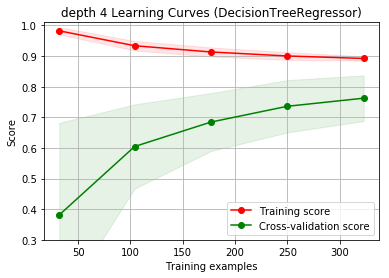

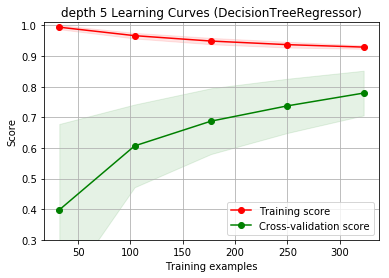

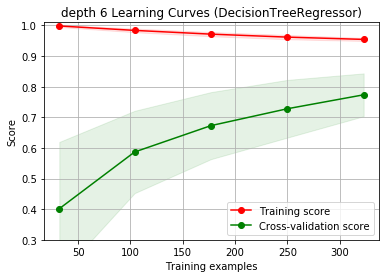

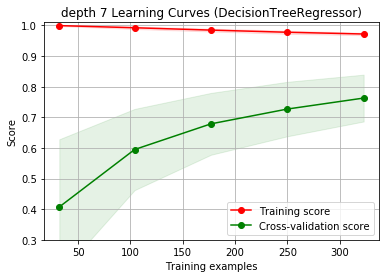

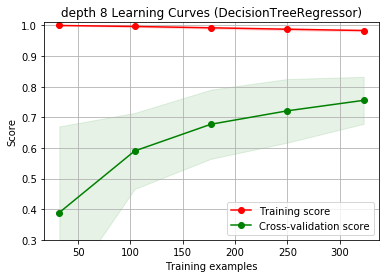

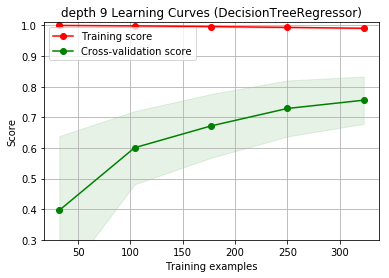

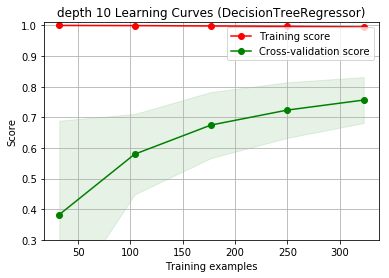

In [15]:
print(__doc__)

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.tree import DecisionTreeRegressor



title = "Learning Curves (DecisionTreeRegressor)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=1)

for degree in range(1,11):
    estimator = DecisionTreeRegressor(max_depth=degree)
    plot_learning_curve(estimator, "depth "+ str(degree) + " " + title , X_train, y_train, ylim=(0.3, 1.01), cv=cv, n_jobs=4)

#### 学習曲線について記述せよ

High varianceとはトレーニングデータのスコアだけがよくてクロスバリデーションの結果が良くない状態、つまり過学習している状態になります。
depthを深くすることで過学習の度合いが強くなり、データ数を増やしても精度が上がらない状態になります。

逆にhigh Biasとは未学習（underfitting）の状態でトレーニングデータ、クロスバリデーションのスコアどちらも高くない、つまりそもそも学習できていない状態です。
木の深さが１，２のときはどちらの値も小さいのでhigh Bias状態になっていることが分かります。

学習曲線を見て**深さ4が最もよい**と判断しました。

なぜならスコアの値がある程度高く、深さ４以上だとトレーニングデータとクロスバリデーションのスコアの開きがサンプルを大きくしても狭まっていないため過学習気味になっているためです。

深さ4では学習曲線を見てると、サンプル数を増やしていくと２つの曲線の差が更に縮まりクロスバリデーションのスコアが良くなると推測できる。

### グリッドサーチ

In [16]:
from sklearn.metrics import r2_score, make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

regressor = DecisionTreeRegressor(random_state=0)
params = {"max_depth":  list(range(1,11))}
scoring_fnc=make_scorer(r2_score)
grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc,cv=5)
grid.fit(X_train,y_train)
print(grid.best_params_)

{'max_depth': 4}


ベストの深さは４と出力された。

### グリッドサーチについて記述せよ

グリッドサーチとは同じデータでハイパーパラメータを変えて学習しスコアを出しそれぞれを比較することで複数のハイパーパラメータの中から最適なパラメータを選択する手法。

別の手法として**ランダムサーチ**があります。
グリッドサーチは与えられたパラメータの値をしらみつぶしに探索するのでその範囲の中で最適なパラメータが求められる反面計算量が多いという欠点があります。
ランダムサーチは与えられたパラメータの組み合わせをランダムで選んで比較を行うため計算量が少なく、よいパラメータのめどをさっと見つけるのに適しています。

どちらを使うかは１回の学習時間や納期との相談になります。


### グリッドサーチを使いこなそう

Kfold数を３，５，１０それぞれで検証する。
評価方法を決定係数ではなく平均２乗誤差を使用する。

In [17]:

for cv_num  in [3, 5, 10]:
    regressor = DecisionTreeRegressor(random_state=0)
    params = {"max_depth": list(range(4,5))}
    scoring_fnc=make_scorer(r2_score)
    grid = GridSearchCV(estimator=regressor,param_grid=params, scoring='neg_mean_squared_error',cv=cv_num)
    grid.fit(X_train,y_train)
    
    print('cv {} : \nbest depth  {} \nbest score {}'.format(cv_num, grid.best_params_, grid.best_score_))

cv 3 : 
best depth  {'max_depth': 4} 
best score -19.145860542970446
cv 5 : 
best depth  {'max_depth': 4} 
best score -15.009009450823399
cv 10 : 
best depth  {'max_depth': 4} 
best score -15.344053767008528


結果はcv5のときに最小スコアが出て、深さ4となった。

### テスト

In [18]:
regressor = DecisionTreeRegressor(max_depth=4)
regressor.fit(X_train, y_train)
print(regressor.score(X_test, y_test))

0.8550749966837611


決定係数が0.8以上となり基準を満たしているため学習は終了となる。